In [ ]:
V = 1 + (ord('C') + ord('А')) % 9
print(V)

1


**Пункт 1**

Согласно первому варианту мы работаем с датасетом "Heart Disease". Данный датасет предназначен для предсказания наличия коронарной болезни сердца по входным признакам.

Исследования:

*   Реализация модели прогнозирования риска сердечно-сосудистых заболеваний с использованием машинного обучения (https://pmc.ncbi.nlm.nih.gov/articles/PMC9085310/)
*   Основы TensorFlow (keras) на примере Heart Disease Dataset (https://habr.com/ru/articles/909040/)

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="notebook")

In [53]:
path = '/content/heart_disease_uci.csv'
df = pd.read_csv(path)

In [54]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


**Пункт 2**

id — идентификатор пациента. Шкала показателей - абсолютная.

age — возраст. Шкала показателей - абсолютная.


sex — пол. Шкала показателей - номинальная.


dataset — источник записи. Шкала показателей - номинальная.


cp — тип боли в груди. Шкала показателей - порядковая.


trestbps — артериальное давление. Шкала показателей - интервальная.


chol — уровень общего холестерина. Шкала показателей - интервальная.


fbs — гликемия. Шкала показателей - номинальная.


restecg — результаты ЭКГ. Шкала показателей - номинальная.


thalach — частота пульса. Шкала показателей - интервальная.


exang — стенокардия, вызванная нагрузкой. Шкала показателей - номинальная.


oldpeak — депрессия сегмента ST при нагрузке относительно покоя. Шкала показателей - интервальная.


slope — наклон пикового сегмента ST. Шкала показателей - номинальная.


ca — число крупных сосудов (0–3), окрашенных при флюороскопии. Шкала показателей - номинальная.


thal — состояние таллия. Шкала показателей - номинальная.


num — степень поражения коронарных артерий от 0 (нет болезни) до 4. Шкала показателей - порядковая.

In [55]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [56]:
datanum, dataobj = df.select_dtypes(include="number", exclude= None), df.select_dtypes(include='object', exclude= None)
if "id" in datanum.columns:
    datanum = datanum.drop(columns=["id"])

if "num" in df.columns:
    dataobj = pd.concat([dataobj, df[["num"]]], axis=1)

namesnum, namesobj = datanum.columns,  dataobj.columns
namesnum, namesobj

(Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num'], dtype='object'),
 Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal',
        'num'],
       dtype='object'))

In [57]:
for col in namesnum:
    print(f"{col:10}  min={datanum[col].min():.2f}  max={datanum[col].max():.2f}")

age         min=28.00  max=77.00
trestbps    min=0.00  max=200.00
chol        min=0.00  max=603.00
thalch      min=60.00  max=202.00
oldpeak     min=-2.60  max=6.20
ca          min=0.00  max=3.00
num         min=0.00  max=4.00


In [58]:
for col in namesobj:
    u = df[col].dropna().unique()
    print(f"{col:10}  кол-во уник. знач.={len(u):3d}  уник.знач.={', '.join(map(str, u[:10]))}{' ...' if len(u)>10 else ''}")

sex         кол-во уник. знач.=  2  уник.знач.=Male, Female
dataset     кол-во уник. знач.=  4  уник.знач.=Cleveland, Hungary, Switzerland, VA Long Beach
cp          кол-во уник. знач.=  4  уник.знач.=typical angina, asymptomatic, non-anginal, atypical angina
fbs         кол-во уник. знач.=  2  уник.знач.=True, False
restecg     кол-во уник. знач.=  3  уник.знач.=lv hypertrophy, normal, st-t abnormality
exang       кол-во уник. знач.=  2  уник.знач.=False, True
slope       кол-во уник. знач.=  3  уник.знач.=downsloping, flat, upsloping
thal        кол-во уник. знач.=  3  уник.знач.=fixed defect, normal, reversable defect
num         кол-во уник. знач.=  5  уник.знач.=0, 2, 1, 3, 4


In [59]:
for col in namesnum:
    print(f"{col:10} ср.зн.={df[col].mean():.2f}")

age        ср.зн.=53.51
trestbps   ср.зн.=132.13
chol       ср.зн.=199.13
thalch     ср.зн.=137.55
oldpeak    ср.зн.=0.88
ca         ср.зн.=0.68
num        ср.зн.=1.00


In [60]:
for col in namesobj:
    modes = df[col].mode(dropna=True)
    mods = ", ".join(map(str, modes.tolist())) if len(modes) else "NaN"
    print(f"{col:12} мода={mods}")

sex          мода=Male
dataset      мода=Cleveland
cp           мода=asymptomatic
fbs          мода=False
restecg      мода=normal
exang        мода=False
slope        мода=flat
thal         мода=normal
num          мода=0


**Пункт 3**

Визуализация для отдельных показателей

np.float64(4.8531839444989595)

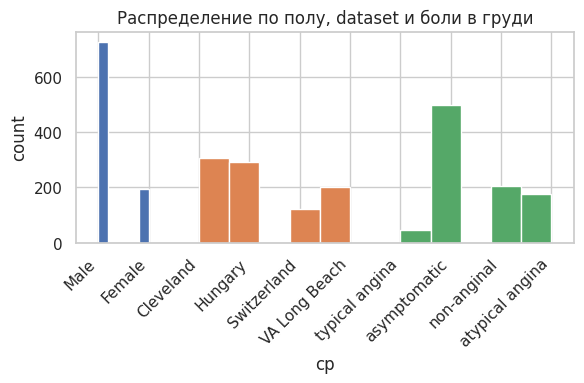

In [61]:
for col in namesobj[:3]:
    ax = dataobj[col].hist(bins=5, figsize=(6,4))
    ax.set(title=f"Распределение по полу, dataset и боли в груди", xlabel=col, ylabel="count")
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    plt.tight_layout()
1+3.2*np.log10(df.shape[1])

Text(0.5, 1.0, 'Возраст по типам боли в груди (cp)')

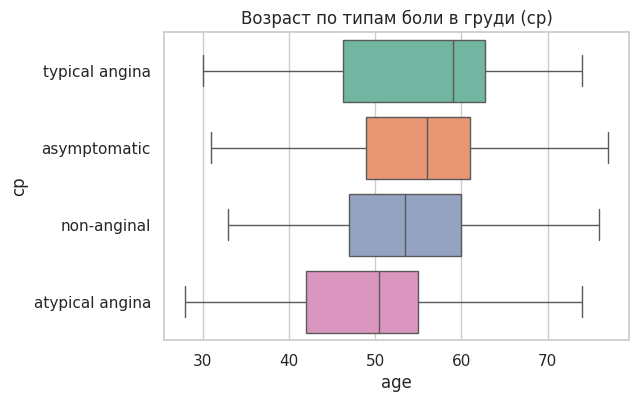

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="age", y = "cp", hue="cp", palette="Set2")
plt.title("Возраст по типам боли в груди (cp)")

Text(0.5, 1.0, 'Распределение oldpeak')

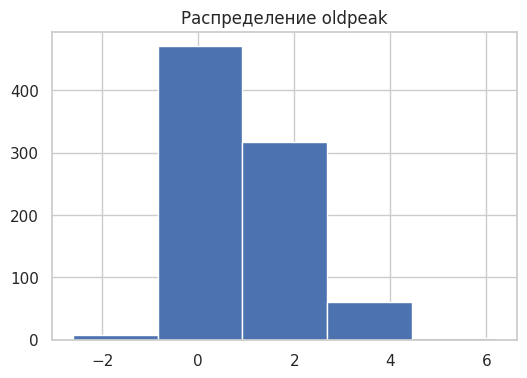

In [63]:
df["oldpeak"].hist(bins=5, figsize=(6,4))
plt.title("Распределение oldpeak")

Text(0.5, 1.0, 'Распределение trestbps')

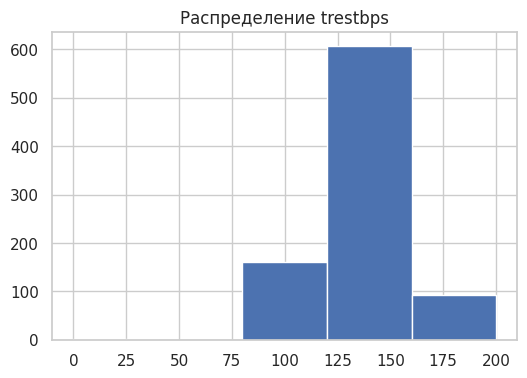

In [64]:
df["trestbps"].hist(bins=5, figsize=(6,4))
plt.title("Распределение trestbps")

**Пункт 4**

Группировка объектов по типу боли в груди.

In [65]:
means = df.groupby("cp")[namesnum].mean(numeric_only=True)
for cp, row in means.iterrows():
    stats = "  ".join(f"{c}={row[c]:.2f}" for c in namesnum)
    print(f"cp={cp}  {stats}")

cp=asymptomatic  age=54.96  trestbps=133.02  chol=187.24  thalch=128.91  oldpeak=1.16  ca=0.92  num=1.44
cp=atypical angina  age=49.24  trestbps=130.34  chol=233.86  thalch=150.86  oldpeak=0.30  ca=0.34  num=0.18
cp=non-anginal  age=53.33  trestbps=130.61  chol=197.57  thalch=144.70  oldpeak=0.64  ca=0.48  num=0.66
cp=typical angina  age=54.83  trestbps=136.10  chol=207.07  thalch=149.52  oldpeak=1.07  ca=0.54  num=0.72


In [66]:
#показатель, который имеет наибольшую разницу в средних значениях для групп
rng = (df.groupby("cp")[namesnum].mean(numeric_only=True).max()
       - df.groupby("cp")[namesnum].mean(numeric_only=True).min())
top = rng.idxmax()
diff = rng.loc[top]

print(f"Макс. разница средних у {top} = {diff:.2f}")

Макс. разница средних у chol = 46.62


Text(0.5, 1.0, 'Холестерин по группам')

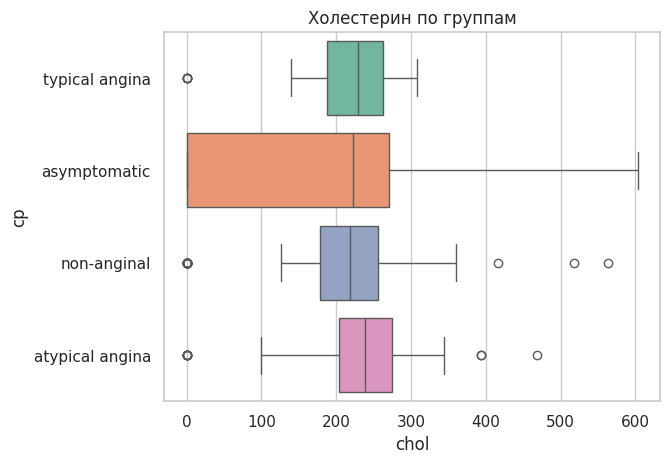

In [67]:
sns.boxplot(data=df.dropna(subset=[top, 'cp']),
            x=top, y='cp',
            hue='cp', palette='Set2')
plt.title("Холестерин по группам")

In [68]:
#качественный показатель, который обладает большей разницей по частотам значений для выделенных групп
cat_cols = namesobj.difference(['cp'])

best_col, best_gap = None, -1.0

groups = df.groupby(['cp'])
for col in cat_cols:
    # доли значений внутри каждой группы cp
    freq = groups[col].value_counts(normalize=True).unstack(fill_value=0)
    # максимальная разница долей одной и той же категории между группами
    gap = (freq.max(axis=0) - freq.min(axis=0)).max()
    print(f"col={col:10}  max gap={gap:.3f}")

    if gap > best_gap:
        best_col, best_gap = col, gap
        best_freq = freq.copy()

print(f"\nТоп по разнице долей: {best_col}  gap={best_gap:.3f}")

for cp, row in best_freq.iterrows():
    stats = "  ".join([f"{lvl}={row[lvl]:.2f}" for lvl in best_freq.columns])
    print(f"cp={cp}  {stats}")

col=dataset     max gap=0.364
col=exang       max gap=0.491
col=fbs         max gap=0.125
col=num         max gap=0.652
col=restecg     max gap=0.246
col=sex         max gap=0.209
col=slope       max gap=0.351
col=thal        max gap=0.435

Топ по разнице долей: num  gap=0.652
cp=asymptomatic  0=0.21  1=0.40  2=0.18  3=0.17  4=0.05
cp=atypical angina  0=0.86  1=0.11  2=0.01  3=0.02  4=0.00
cp=non-anginal  0=0.64  1=0.18  2=0.07  3=0.09  4=0.02
cp=typical angina  0=0.57  1=0.26  2=0.09  3=0.07  4=0.02


**Пункт 5**

Визуализация зависимостей показателей.

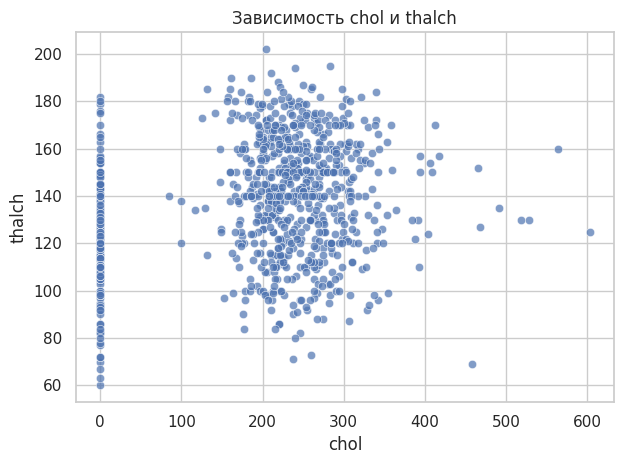

In [69]:
sns.scatterplot(data=df, x="chol", y="thalch", alpha=0.7)
plt.title("Зависимость chol и thalch")
plt.tight_layout(); plt.show()

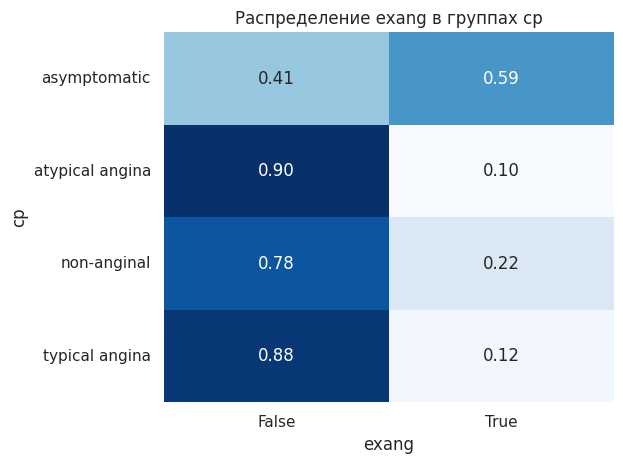

In [70]:
ct = pd.crosstab(df["cp"], df["exang"], normalize="index")
sns.heatmap(ct, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title("Распределение exang в группах cp")
plt.tight_layout(); plt.show()


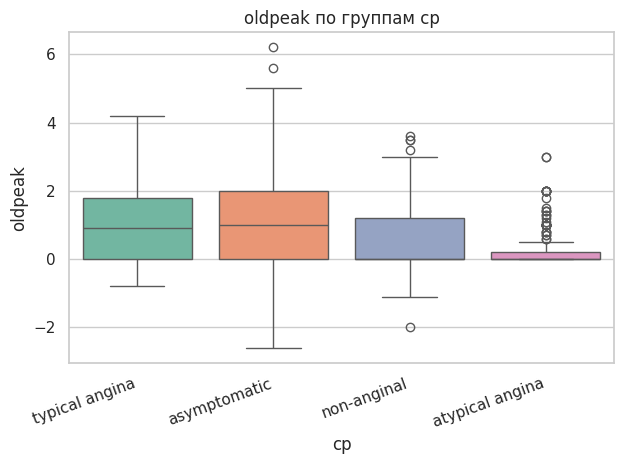

In [71]:
sns.boxplot(data=df.dropna(subset=["oldpeak","cp"]),
            x="cp", y="oldpeak", hue="cp", palette="Set2", legend=False, showfliers=True)
plt.title("oldpeak по группам cp")
plt.xticks(rotation=20, ha="right")
plt.tight_layout(); plt.show()


**Пункт 6**

Пропуски данных и аномальные выбросы.

In [72]:
#подсчет пропусков
pd.DataFrame({
    'missing': df.isna().sum(),
    'missing_pct': (df.isna().mean()*100).round(2)
}).sort_values('missing', ascending=False)


,missing,missing_pct
ca,611,66.41
thal,486,52.83
slope,309,33.59
fbs,90,9.78
oldpeak,62,6.74
trestbps,59,6.41
exang,55,5.98
thalch,55,5.98
chol,30,3.26
restecg,2,0.22


In [73]:
#подсчет выбросов
outlier_info = {}
for col in namesnum:
    s = df[col].dropna()
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    idx = df.index[(df[col] < low) | (df[col] > high)]
    outlier_info[col] = {"count": len(idx), "low": float(low), "high": float(high)}
    print(f"{col}: выбросов={len(idx)}  границы [{low:.2f}, {high:.2f}]")

age: выбросов=0  границы [27.50, 79.50]
trestbps: выбросов=28  границы [90.00, 170.00]
chol: выбросов=183  границы [35.50, 407.50]
thalch: выбросов=2  границы [64.50, 212.50]
oldpeak: выбросов=16  границы [-2.25, 3.75]
ca: выбросов=20  границы [-1.50, 2.50]
num: выбросов=0  границы [-3.00, 5.00]


In [74]:
#заполнение пропусков
df_filled = df.copy()
for c in df_filled.columns:
    if c in namesnum:
        med = df_filled[c].median()
        df_filled[c] = df_filled[c].fillna(med)
    else:
        mode = df_filled[c].mode(dropna=True)
        if not mode.empty:
            df_filled[c] = df_filled[c].fillna(mode.iloc)

In [75]:
#повторная проверка
pd.DataFrame({
    'missing': df_filled.isna().sum(),
    'missing_pct': (df_filled.isna().mean()*100).round(2)
}).sort_values('missing', ascending=False)

,missing,missing_pct
id,0,0.0
age,0,0.0
sex,0,0.0
dataset,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalch,0,0.0
